In [14]:
#A1

import pandas as pd
import numpy as np
from numpy.linalg import pinv, matrix_rank

x = '/content/drive/MyDrive/machine_learning/Lab_Session1_Data.xlsx'
data = pd.read_excel(x, sheet_name='Purchase data')
# Remove columns with NaN values
data = data.dropna(axis=1)

# Segregate data into matrices A and C in the form AX = C
columns_A = ['Candies (#)', 'Mangoes (Kg)', 'Milk Packets (#)']
A = data[columns_A].values

column_C = ['Payment (Rs)']
C = data[column_C].values

# Calculate the dimensionality of the vector space
dimensionality = len(columns_A)
print("Dimensionality of the vector space:", dimensionality)

# Calculate the number of vectors in the vector space
num_vectors = data.shape[0]  # Number of rows in the dataset
print("Number of vectors in the vector space:", num_vectors)

# Calculate the rank of Matrix A
rank_A = matrix_rank(A)
print("Rank of Matrix A:", rank_A)

# Solve for product costs (X) using pseudo-inverse
X = pinv(A) @ C
print("Estimated product costs (Candies, Mangoes, Milk Packets):")
print(X)

# Get the shape of the data
data_shape = data.shape

print(data)
# Print the shape
print("Data shape (rows, columns):", data_shape)

Dimensionality of the vector space: 3
Number of vectors in the vector space: 10
Rank of Matrix A: 3
Estimated product costs (Candies, Mangoes, Milk Packets):
[[ 1.]
 [55.]
 [18.]]
  Customer  Candies (#)  Mangoes (Kg)  Milk Packets (#)  Payment (Rs)
0      C_1           20             6                 2           386
1      C_2           16             3                 6           289
2      C_3           27             6                 2           393
3      C_4           19             1                 2           110
4      C_5           24             4                 2           280
5      C_6           22             1                 5           167
6      C_7           15             4                 2           271
7      C_8           18             4                 2           274
8      C_9           21             1                 4           148
9     C_10           16             2                 4           198
Data shape (rows, columns): (10, 5)


In [15]:
#A2

# Display the estimated product costs
product_names = columns_A
for product, cost in zip(product_names, X):
    print(f"Estimated cost of {product}: {int(cost[0])}")

#more accurate way
# Solve for product costs (X) using pseudo-inverse
X = pinv(A) @ C
print("Estimated product costs (Candies, Mangoes, Milk Packets):")
print(X)

Estimated cost of Candies (#): 0
Estimated cost of Mangoes (Kg): 54
Estimated cost of Milk Packets (#): 18
Estimated product costs (Candies, Mangoes, Milk Packets):
[[ 1.]
 [55.]
 [18.]]


In [16]:
#A3
import pandas as pd

# Create a new column 'Customer Class' based on payment amount
data['Customer Class'] = ['RICH' if payment > 200 else 'POOR' for payment in data['Payment (Rs)']]


In [17]:
#A3
from sklearn.preprocessing import StandardScaler

# Features for the classifier
features = ['Candies (#)', 'Mangoes (Kg)', 'Milk Packets (#)']

# Scale the features
'''Scale the features to ensure they're on the same scale.
This can improve the performance of certain machine learning algorithms'''
scaler = StandardScaler()
data[features] = scaler.fit_transform(data[features])

In [18]:
#A3
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# Split data into features (X) and target (y)
X = data[features]
y = data['Customer Class']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a decision tree classifier
classifier = DecisionTreeClassifier(random_state=42)

# Train the classifier
classifier.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [19]:
#A3
from sklearn.metrics import accuracy_score

# Predict classes for the test set
y_pred = classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.5


Mean Price: 1560.663453815261
Variance of Price: 58732.365352539186
Sample Mean on Wednesdays: 1550.706
Population Mean of Price: 1560.663453815261
Sample Mean for April: 1698.9526315789474
Probability of making a loss: 0.4979919678714859
Probability of making a profit on Wednesday: 0.42
Conditional Probability of making profit on Wednesday: 0.42


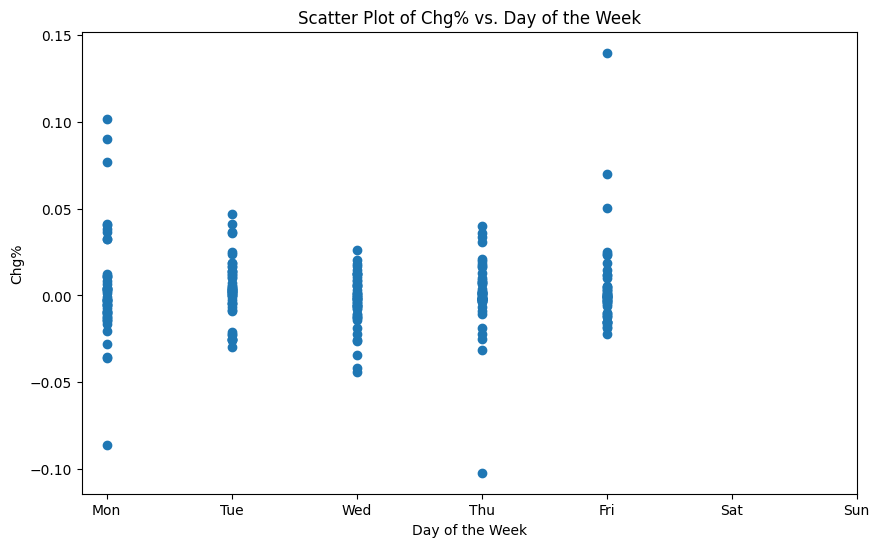

In [20]:
#A4

import pandas as pd
import statistics
import matplotlib.pyplot as plt

# Load data from Excel file
data1 = pd.read_excel('/content/drive/MyDrive/machine_learning/Lab_Session1_Data.xlsx', sheet_name='IRCTC Stock Price')

# Calculate the mean and variance of the Price data
price_mean = statistics.mean(data1['Price'])
price_variance = statistics.variance(data1['Price'])
print("Mean Price:", price_mean)
print("Variance of Price:", price_variance)

# Convert the 'Date' column to datetime format
data1['Date'] = pd.to_datetime(data1['Date'])

# Select the price data for all Wednesdays
wednesday_data = data1[data1['Date'].dt.day_name() == 'Wednesday']
wednesday_sample_mean = statistics.mean(wednesday_data['Price'])
print("Sample Mean on Wednesdays:", wednesday_sample_mean)
print("Population Mean of Price:", price_mean)

# Select the price data for the month of April
april_data = data1[data1['Date'].dt.month == 4]
april_sample_mean = statistics.mean(april_data['Price'])
print("Sample Mean for April:", april_sample_mean)

# Calculate the probability of making a loss over the stock
loss_probability = len(data1[data1['Chg%'] < 0]) / len(data1)
print("Probability of making a loss:", loss_probability)

# Calculate the probability of making a profit on Wednesday
profit_on_wednesday_probability = len(wednesday_data[wednesday_data['Chg%'] > 0]) / len(wednesday_data)
print("Probability of making a profit on Wednesday:", profit_on_wednesday_probability)

# Calculate the conditional probability of making profit given that today is Wednesday
wednesday_and_profit_data = wednesday_data[wednesday_data['Chg%'] > 0]
conditional_probability = len(wednesday_and_profit_data) / len(wednesday_data)
print("Conditional Probability of making profit on Wednesday:", conditional_probability)

# Scatter plot of Chg% data against the day of the week
plt.figure(figsize=(10, 6))
plt.scatter(data1['Date'].dt.dayofweek, data1['Chg%'])
plt.xticks(range(7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.xlabel("Day of the Week")
plt.ylabel("Chg%")
plt.title("Scatter Plot of Chg% vs. Day of the Week")
plt.show()
